In [ ]:
# ¡ Paquetes !
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, ifft
plt.rcParams['mathtext.fontset'] = 'stix'

In [ ]:
data_ = pd.read_csv('/content/Myers Briggs Table_S1.csv')
data = data_.drop([data_.columns[i] for i in range(10,20)], axis=1)
del(data['S No']); data

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4
0,53,62,125,Female,Low,0.0,0.0,0.0,0.0
1,52,69,157,Male,High,7.0,8.0,5.0,3.0
2,30,69,200,Male,High,0.0,0.0,0.0,0.0
3,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5
4,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
92,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0
93,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0
94,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0
95,28,67,180,Female,Low,0.0,0.0,0.0,0.0


In [ ]:
data.describe()

,S No,AGE,HEIGHT,WEIGHT,PAIN 1,PAIN 2,PAIN 3,PAIN 4
count,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,43.855670,65.731959,159.43299,2.139175,3.747423,1.943299,2.530928
std,28.145456,16.776093,3.737522,36.19591,2.572635,3.191071,2.587909,3.111483
min,1.000000,11.000000,58.000000,68.00000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,30.000000,63.000000,135.00000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,45.000000,66.000000,157.00000,1.000000,3.000000,0.500000,0.000000
75%,73.000000,56.000000,68.000000,183.00000,4.000000,7.000000,3.500000,5.000000
max,97.000000,82.000000,74.000000,263.00000,9.500000,10.000000,10.000000,10.000000


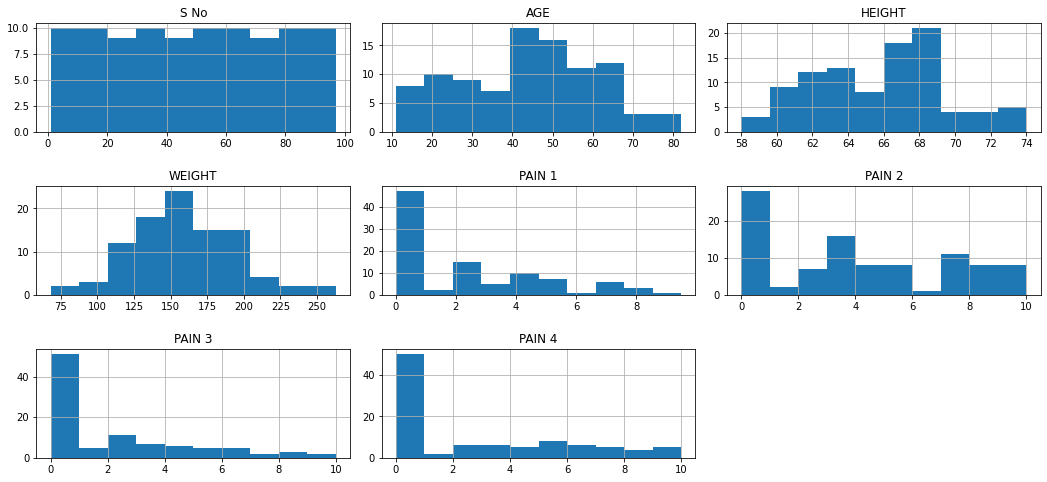

In [ ]:
data.hist(figsize=(18,8)); plt.subplots_adjust(hspace = 0.5, wspace = 0.1); plt.show()

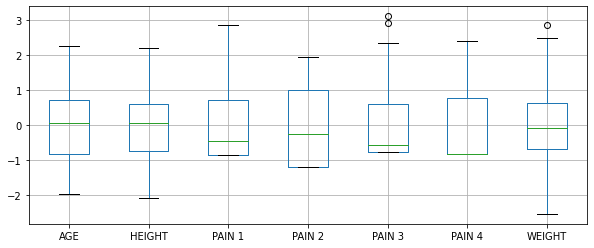

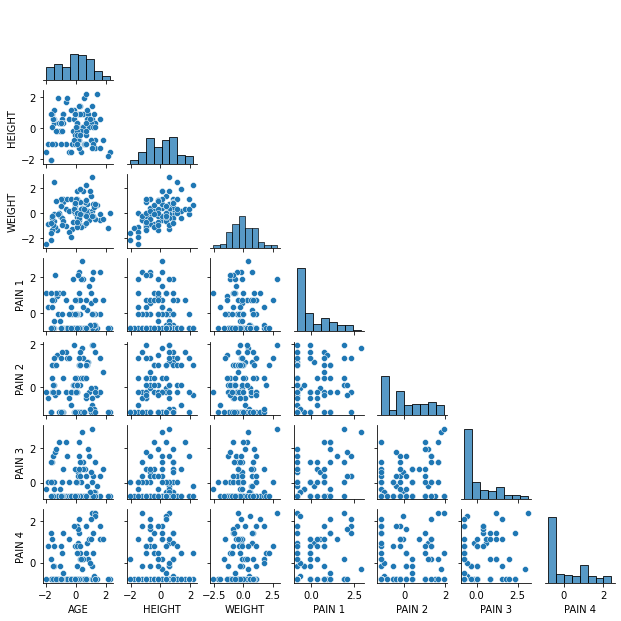

In [ ]:
data_estd = (data-data.mean())/data.std()
data_estd.boxplot(figsize=(10,4)); plt.show()
sns.pairplot(data_estd[['AGE','HEIGHT','WEIGHT','PAIN 1','PAIN 2','PAIN 3','PAIN 4']]
             ,height=1.25, corner=True); plt.show()

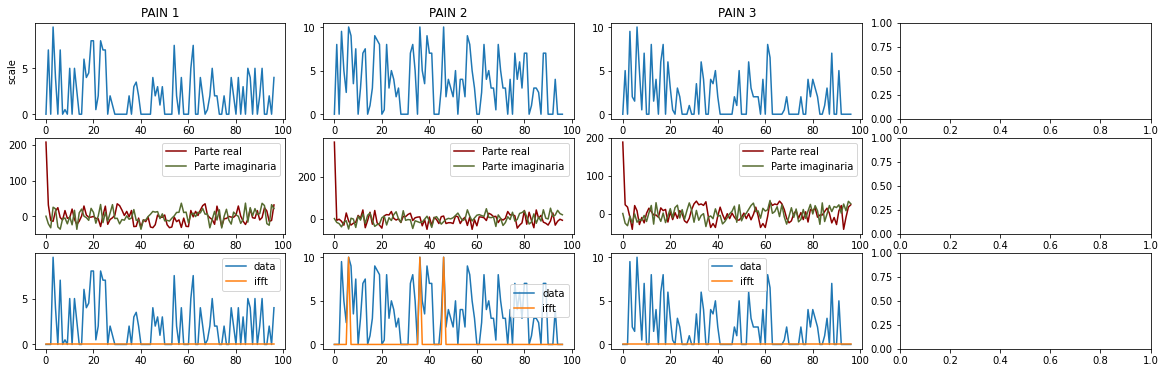

In [ ]:
fig,ax = plt.subplots(3,4, figsize=(20,6))
ax[0,0].set_ylabel('scale')
for i in range(3):
  Y = np.array([float(i) for i in data[f'PAIN {i+1}']])
  ax[0,i].plot(data[f'PAIN {i+1}'])
  ax[0,i].set_title(f'PAIN {i+1}')
  
  ax[1,i].plot(np.real(fft(Y)), 'darkred', label='Parte real')
  ax[1,i].plot(np.imag(fft(Y)), 'darkolivegreen', label='Parte imaginaria')
  ax[1,i].legend(fontsize=8)
  W = Y.copy()
  for n in range(2, len(Y)): W[n]=0
  x0 = W.copy(); Z0 = ifft(x0); W = Y.copy() 
  for n in range(len(W)):
    if W[n]!=sorted(Y)[-1] or W[n]!=sorted(Y)[-2]: 
      W[n]=0
  x1 = W.copy(); Z1 = ifft(x1)
  ax[2,i].plot(abs(Y-x0),label='data')
  ax[2,i].plot(abs(x1),label='ifft')
  ax[2,i].legend(fontsize=8)


plt.subplots_adjust(wspace = 0.15); plt.show()

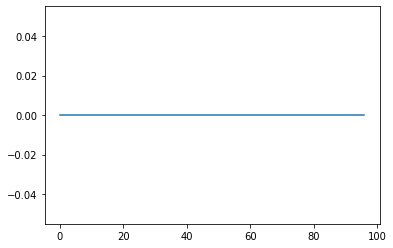

In [ ]:
W = Y.copy()
for n in range(len(W)):
    if W[n]!=sorted(Y)[-1] or W[n]!=sorted(Y)[-2]: 
      W[n]=0
    else: print('a')
plt.plot(W)

In [ ]:
sorted(Y)[-1]

10.0